<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dati-e-frequenze" data-toc-modified-id="Dati-e-frequenze-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dati e frequenze</a></span><ul class="toc-item"><li><span><a href="#Dati-quantitativi-e-qualitativi" data-toc-modified-id="Dati-quantitativi-e-qualitativi-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dati quantitativi e qualitativi</a></span><ul class="toc-item"><li><span><a href="#Classificazione-dei-dati-qualitativi" data-toc-modified-id="Classificazione-dei-dati-qualitativi-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Classificazione dei dati qualitativi</a></span></li><li><span><a href="#Classificazione-dei-dati-quantitativi" data-toc-modified-id="Classificazione-dei-dati-quantitativi-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Classificazione dei dati quantitativi</a></span></li></ul></li><li><span><a href="#Frequenze-assolute-e-relative-e-loro-visualizzazione" data-toc-modified-id="Frequenze-assolute-e-relative-e-loro-visualizzazione-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Frequenze assolute e relative e loro visualizzazione</a></span></li><li><span><a href="#Frequenze-cumulate" data-toc-modified-id="Frequenze-cumulate-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Frequenze cumulate</a></span><ul class="toc-item"><li><span><a href="#Diagrammi-di-Pareto" data-toc-modified-id="Diagrammi-di-Pareto-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Diagrammi di Pareto</a></span></li></ul></li><li><span><a href="#Frequenze-congiunte-e-marginali" data-toc-modified-id="Frequenze-congiunte-e-marginali-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Frequenze congiunte e marginali</a></span></li><li><span><a href="#Alcuni-approfondimenti-sulla-generazione-dei-grafici-*" data-toc-modified-id="Alcuni-approfondimenti-sulla-generazione-dei-grafici-*-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Alcuni approfondimenti sulla generazione dei grafici <sup>*</sup></a></span></li><li><span><a href="#I-diagrammi-stelo-foglia-*" data-toc-modified-id="I-diagrammi-stelo-foglia-*-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>I diagrammi stelo-foglia <sup>*</sup></a></span></li></ul></li></ul></div>

<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Dati e frequenze.
</div>
<hr style="width: 90%;" align="left" />





<div id="h-0"></div>

# Dati e frequenze

Vedremo come esistano tipi differenti di dati, e come in funzione del loro tipo esistano diversi strumenti grafici che li descrivono. Studieremo inoltre in modo più approfondito e diversificato il concetto di _frequenza_.

Come sempre, carichiamo le librerie e il dataset dei supereroi. Già che ci siamo, escludiamo l'unico record che fa riferimento al 2099 come anno di prima apparizione.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))


heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)
heroes_with_year = heroes[heroes['First appearance'] < 2020] #Estratti gli anni < 2020

heroes_with_year.head()

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Agent Bob,Bob,NaN,Marvel Comics,178.25,81.45,M,2007.0,Brown,Brown,10.0,low
Abe Sapien,Abraham Sapien,NaN,Dark Horse Comics,191.24,65.35,M,1993.0,Blue,No Hair,30.0,high
Abin Sur,NaN,Ungara,DC Comics,185.52,90.90,M,1959.0,Blue,No Hair,90.0,average
Animal Man,Bernhard Baker,NaN,DC Comics,183.80,83.39,M,1965.0,Blue,Blond,50.0,average






<div id="h-1"></div>

## Dati quantitativi e qualitativi

Una delle principali distinzioni che si possono fare sui dati osservabili riguarda il modo in cui questi sono misurati:

<ul>
  <li>si parla di dati _quantitativi_ se l'esito della misurazione è una quantità numerica;</li>
  <li>si parla invece di dati _qualitativi_ (o categorici, o nominali) quando la misurazione è fatta scegliendo un'etichetta a partire da un insieme disponibili.</li>
</ul>

Pertanto nel nostro dataset i caratteri _Height_, _Weight_ e _Strength_ saranno da considerare quantitativi, mentre i caratteri _Name_, _Identity_, _Birth place_, _Publisher_, _Gender_, _Eye color_, _Hair color_ e _Intelligence_ saranno sicuramente di tipo qualititativo (la differenza tra _Strength_ e _Intelligence_ è legata al fatto che il primo carattere è misurato tramite numeri che variano tra 0 e 100 mentre il secondo fa riferimento a una scala basata su etichette). La classificazione di _First appearance_ è più sfumata e merita qualche riflessione in più: sebbene l'anno di prima apparizione sia misurato tramite un numero intero, il suo valore non indica prettamente una _quantità_, bensì _quando_ è accaduto un evento. In tal senso, il calcolo di operazioni aritmetiche quali la somma o la divisione perde di significato, ed è per questo che spesso caratteri di questo tipo ricadono nella classe dei dati qualitativi. Cionondimeno, vedremo come sia possibile ragionare sul carattere _First appearance_ anche in termini quantitativi quando per esempio parleremo della visualizzazione di istogrammi. Ci sono poi casi di caratteri espressi in termini temporali in cui viene misurato il tempo intercorso a partire da un dato istante iniziale (come per esempio il tempo di arrivo del primo cliente in un negozio, misurato in minuti dall'orario di apertura), di cui è chiara l'appartenenza alla classe dei dati quantitativi.





<div id="h-2"></div>

### Classificazione dei dati qualitativi

I dati qualitativi vengono spesso ulteriormente classificati come binari/booleani, nominali oppure ordinali. Si parla di dati _binari_ o _booleani_ quando l'osservazione può avere solo due esiti tra loro non confrontabili (volendo si può parlare di dati booleani per enfatizzare che si sta valutando la presenza o l'assenza di una proprietà, e di dati binari quando esistono due possibili etichette): in tal senso, il carattere _Gender_, che può assumere solo i valori M e F, è quindi un carattere qualitativo binario. Anche nei dati _nominali_ (detti anche sconnessi), di cui i dati binari rappresentano un caso particolare, i valori osservabili non sono tra loro confrontabili, sebbene non vi sia limite sul numero di diverse etichette. Saranno dunque dati qualitativi nominali, oltre al già considerato _Gender_, anche _Name_, _Identity_, _Birth place_, _Publisher_, _Gender_, _Eye color_ e _Hair color_. Detto in altri termini, in questo tipo di dati (e quindi anche nel caso binario/booleano) è solo possibile stabilire una relazione di equivalenza tra i valori osservabili: pertanto, due osservazioni potranno avere valori uguali oppure diversi, e nulla più si potrà dire sul loro rapporto. Nei dati _ordinali_, invece, è possibile stabilire una relazione d'ordine tra i valori osservabili, e quindi quando due valori saranno diversi sarà anche possibile dire quale tra i due sia il più piccolo e quale il più grande. Nel nostro dataset, solo _Intelligence_ è un dato qualitativo ordinale.





<div id="h-3"></div>

### Classificazione dei dati quantitativi

Per quanto riguarda i dati quantitativi, viene spesso fatto riferimento alla differenza tra dati _discreti_ e _continui_ in funzione del tipo di insieme di valori che questi possono assumere. Va in realtà notato che i dati che elaboriamo sono memorizzati su un computer e quindi i valori reali vengono approssimati tramite valori all'interno di un insieme finito (dunque discreto). Vale più la pena ragionare in termini di caratteri per cui ha senso dare significato a un singolo valore (come nel caso dell'anno di prima apparizione, in cui ha senso considerare gli eroi apparsi nel 1970) e di caratteri in cui di norma ha senso considerare un _intervallo_ di valori (come nel caso dei rimanenti caratteri: ha di solito poco senso considerare, per esempio, un eroe alto esattamente 178 centimetri o con un indice di forza pari a 42).

In alcuni casi si considerano diversi i caratteri quantitativi in funzione che abbia o meno senso considerare il _rapporto_ tra i corrispondenti valori: sarebbe questo il caso dei caratteri _Height_, _Weight_ e _Strength_ nel nostro dataset.






<div id="h-4"></div>

## Frequenze assolute e relative e loro visualizzazione

Abbiamo già incontrato il concetto di _frequenza assoluta_: si tratta del conteggio del numero di volte che una data osservazione occorre in un campione. Questo tipo di informazione è facilmente analizzabile quando il nuemro di differenti osservazioni non è troppo grande: ciò accade quasi sempre quando si analizzano caratteri qualitativi e relativamente meno spesso per i caratteri quantitativi. Prendiamo per esempio in considerazione il carattere _Publisher_, e calcoliamone le frequenze assolute usando il già introdotto metodo `value_counts`:

In [3]:
heroes_with_year['Publisher'].value_counts()

Marvel Comics        205
DC Comics            121
Dark Horse Comics     12
George Lucas          11
ABC Studios            4
Image Comics           3
Rebellion              1
Star Trek              1
Universal Studios      1
Hanna-Barbera          1
Name: Publisher, dtype: int64

Vi sono dunque, nel dataset che stiamo analizzando, dieci diversi valori possibili per l'editore: ciò rende l'insieme delle frequenze assolute facilmente visualizzabile in forma tabulare, costruendo la cosiddetta _tabella delle frequenze assolute_ in cui si ha una riga per ogni possibile valore osservabile, e tale riga contiene il valore stesso e la corrispondente frequenza assoluta. In senso lato, già l'output di `value_counts` è una tabella delle frequenze assolute. *Ciò che passo è l'indice del **dataframe** in questo caso il mio `publisher` e posso anche dargli un nome. La differenza tra `value_counts` e `crosstab` è che quest'ultimo restituisce `dataframe`*:

In [4]:
publisher_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                             columns=['Abs. frequence'],
                             colnames=[''])
publisher_freq

,Abs. frequence
Publisher,
ABC Studios,4
DC Comics,121
Dark Horse Comics,12
George Lucas,11
Hanna-Barbera,1
Image Comics,3
Marvel Comics,205
Rebellion,1
Star Trek,1


<div class="alert alert-info">
L'argomento essenziale di `pd.crosstab` è, in questo caso, `index`, che viene impostato alla serie di cui vanno calcolate le frequenze assolute; i due rimanenti argomenti influiscono solo sul modo in cui viene visualizzata la tabella delle frequenze: `columns` contiene una lista il cui unico elemento è l'intestazione della colonna delle frequenze, mentre `colnames` viene impostato a una lista contenente una stringa vuota al fine di non visualizzare un'ulteriore etichetta per l'intera tabella.
</div>

Essendo l'output di `pd.crosstab` un _dataframe_, su esso si possono eseguire operazioni quali _slicing_, accesso basato su indice e su posizione e così via. Ciò permette di trasformare facilmente una tabella di frequenze relative nella corrispondente tabella delle _frequenze relative_, dove la frequenza relativa di un'osservazione è la frazione di casi in quell'osservazione occorre. L'uso delle frequenze relative permette di valutare più facilmente la grandezza dei valori in gioco, in quanto questi varieranno sempre tra 0 e 1, mentre le frequenze assolute non hanno a priori un valore massimo e quindi è meno facile valutare se una frequenza è «alta» o «bassa». Allora calcolo le frequenze relative. Le frequenze relative si calcolano dividendo quelle assolute per il numero totale di casi; quest'ultimo è ovviamente uguale alla somma di tutte le frequenze assolute, quindi la tabella delle frequenze relative si può ottenere nel modo seguente: 

In [5]:
publisher_abs_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                                 columns=['Rel. frequence'],
                                 colnames=[''])
publisher_rel_freq = publisher_abs_freq / publisher_abs_freq.sum() #divido ogni elemento della colonna e divido per la somma dei valori della colonna stessa

publisher_rel_freq

,Rel. frequence
Publisher,
ABC Studios,0.011111
DC Comics,0.336111
Dark Horse Comics,0.033333
George Lucas,0.030556
Hanna-Barbera,0.002778
Image Comics,0.008333
Marvel Comics,0.569444
Rebellion,0.002778
Star Trek,0.002778


In realtà è possibile creare direttamente la tabella delle frequenze relative specificando il valore `True` per l'argomento `normalize`. Questo mi restituisce un `Dataframe` con le *frequenze relative* calcolate. Vedi qua sotto:

In [6]:
publisher_rel_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                                 columns=['Rel. frequence'],
                                 colnames=[''],
                                 normalize=True)
publisher_rel_freq

,Rel. frequence
Publisher,
ABC Studios,0.011111
DC Comics,0.336111
Dark Horse Comics,0.033333
George Lucas,0.030556
Hanna-Barbera,0.002778
Image Comics,0.008333
Marvel Comics,0.569444
Rebellion,0.002778
Star Trek,0.002778


*La visualizzazione della tabella può essere migliorata riducendo il numero di cifre visualizzate, applicando ai suoi elementi la funzione `np.round`* che arrotonda un valore floating point mantenendo un numero prefissato di cifre decimali:<br><br>Applico una funzione mebro a membro sulla colonna tramite `apply` di `Pandas`. Nota bene, applico a **tutti i valori della colonna**. Comunque applico funzione `lamba`.

In [7]:
publisher_rel_freq.apply(lambda p: 100 * np.round(p, 3))

,Rel. frequence
Publisher,
ABC Studios,1.1
DC Comics,33.6
Dark Horse Comics,3.3
George Lucas,3.1
Hanna-Barbera,0.3
Image Comics,0.8
Marvel Comics,56.9
Rebellion,0.3
Star Trek,0.3


Volendo visualizzare la frequenza relativa usando delle percentuali è possibile operare in modo simile: basta moltiplicare per 100 i valori una volta che questi sono stati arrotondati in modo da tener conto delle cifre decimali che si vogliono visualizzare. Nella cella seguente il risultato viene convertito in una serie di stringhe, così da poter effettuare un'ultima trasformazione che visualizza le percentuali utilizzando il simbolo `%`.<br><br>Per poter aggiungere un carattere stringa devo convertire il mio dato in stringa ma non con `str(obj)` ma con `astype`, così converto elemento per elemento.

In [8]:
(publisher_rel_freq.apply(lambda p: np.round(100*p, 2))
                   .astype(str)
                   .apply(lambda s: s + '%'))

,Rel. frequence
Publisher,
ABC Studios,1.11%
DC Comics,33.61%
Dark Horse Comics,3.33%
George Lucas,3.06%
Hanna-Barbera,0.28%
Image Comics,0.83%
Marvel Comics,56.94%
Rebellion,0.28%
Star Trek,0.28%


L'ordine delle righe in una tabella delle frequenze è quello individuato dal suo indice, che tipicamente è legato all'ordinamento predefinito (non decrescente) dei suoi elementi: nel caso di stringhe, quindi, le righe saranno ordinate alfabeticamente per i valori della prima colonna.

In [9]:
gender_freq = pd.crosstab(index=heroes_with_year['Gender'],
                          columns=['Abs. frequence'],
                          colnames=[''])
gender_freq

,Abs. frequence
Gender,
F,87
M,272


Volendo modificare tale ordine è possibile accedere al _dataframe_ corrispondente alla tabella tramite `loc` **e specificando come secondo argomento una lista dei valori nell'ordine desiderato:**

In [10]:
gender_freq.loc[['M', 'F']]

,Abs. frequence
Gender,
M,272
F,87


Abbiamo già visto come utilizzando l'attributo `plot` di una serie sia possibile visualizzarne graficamente i contenuti. In particolare, per i dati di tipo qualitativo è tipicamente sensato utilizzare i **grafici a barre**:

In questo caso è molto bello usare questo diagramma in quanto il dato è di tipo *qualitativo* non ordinato e quindi le barre sono molto ben visualizzate.

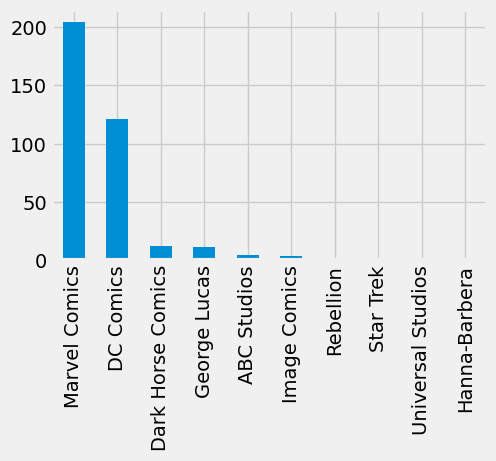

In [11]:
heroes_with_year['Publisher'].value_counts().plot.bar()
plt.show()

Un grafico analogo si ottiene invocando sempre il metodo `plot.bar` sul _dataframe_ corrispondente alla tabella delle frequenze:

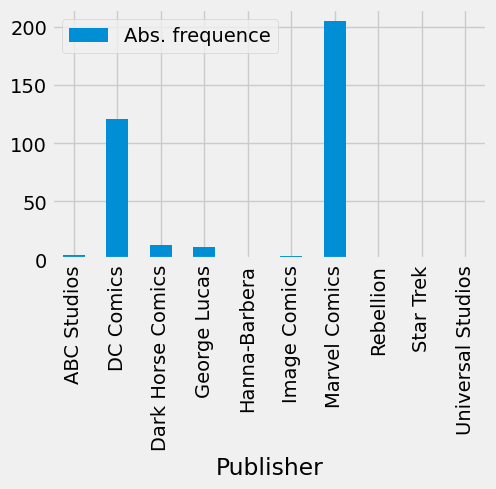

In [12]:
publisher_freq.plot.bar() #Dato fatto con crosstab()
plt.show()

Vi sono due principali differenze tra i grafici a barre ottenuti:

- nel primo le barre sono ordinate per frequenza non crescente, mentre nel secondo queste seguono l'ordinamento (in questo caso alfabetico) dei corrispondenti valori;
- il secondo grafico contiene una legenda ed etichetta l'asse delle ascisse con il nome del carattere considerato.

Volendo eliminare la legenda è sufficiente rigenerare il grafico specificando il valore `False` per l'argomento `legend`:

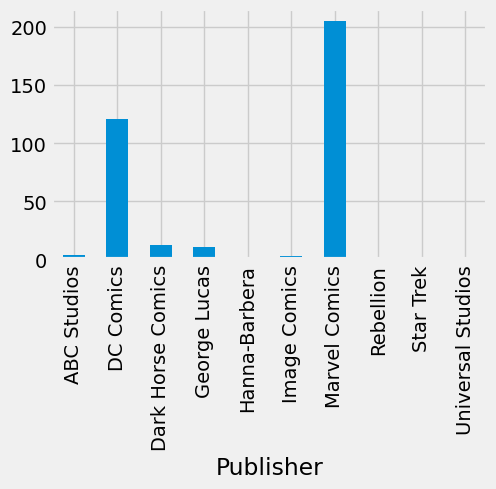

In [13]:
publisher_freq.plot.bar(legend=False)
plt.show()

Volendo visualizzare le barre in un ordine differente è sufficiente riordinare il _dataframe_ nello stesso già visto per le tabelle delle frequenze, prima di invocare `plt.plot`.

Creo un a lista con gli elementi in ordine che voglio io,, e poi la assegno alla varibile con la proprietà `loc` per asssociare il nome alla sua frequenza relative.

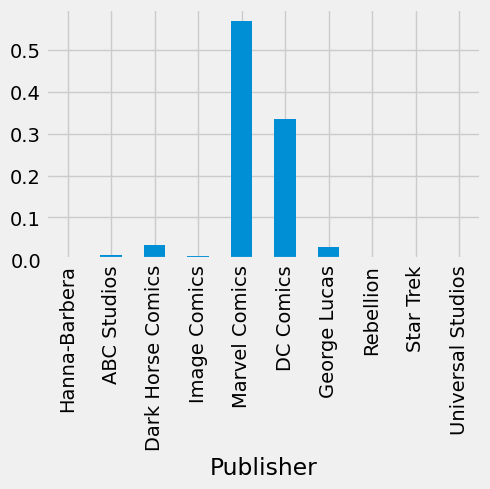

In [14]:
publisher_order = ['Hanna-Barbera', 'ABC Studios', 'Dark Horse Comics',
                   'Image Comics', 'Marvel Comics', 'DC Comics',
                   'George Lucas', 'Rebellion', 
                   'Star Trek', 'Universal Studios']

publisher_rel_freq.loc[publisher_order,:].plot.bar(legend=False)
plt.show()

Oltre a modificare l'ordine delle barre, il grafico precedente visualizza le frequenze relative, ottenute in questo caso facendo riferimento alla tabella `publisher_rel_freq` precedentemente generata. Ovviamente il grafico che si ottiene è analogo a quello delle frequenze assolute: l'unica cosa che cambia è la scala dei valori sull'asse delle ascisse.

L'uso delle frequenze relative permette anche di confrontare situazioni in cui il numero di osservazioni è variabile. Se per esempio volessimo comparare le frequenze della forza dei supereroi con quelle delle supereroine, ci troveremmo con due diversi numeri di osservazioni:

In [15]:
#Accede agli heroes tirando fuori i maschi e la forza e calcola le frequenze assolute con crosstab
male_strength_freq = pd.crosstab(index=heroes.loc[heroes['Gender']=='M',
                                                  'Strength'],
                                 columns='Abs. freq.')

#Accede agli heroes tirando fuori le femmine e la forza e calcola le frequenze assolute con crosstab
female_strength_freq = pd.crosstab(index=heroes.loc[heroes['Gender']=='F',
                                                    'Strength'],
                                   columns='Abs. freq.')

#Sommo per sapere il numero di maschi e il numero di femmine usando le frequenze assolute e sommando il valore
num_male = sum(male_strength_freq['Abs. freq.'])
num_female = sum(female_strength_freq['Abs. freq.'])

print('Ci sono {} supereroi e {} supereroine'.format(num_male, num_female))
male_strength_freq

Ci sono 428 supereroi e 164 supereroine


col_0,Abs. freq.
Strength,
5.0,4
10.0,92
15.0,43
20.0,25
25.0,2
30.0,19
35.0,26
40.0,14
45.0,3


Sovrapporre quindi i grafici a barre delle frequenze assolute non avrebbe senso, perché le relative altezze non sarebbero confrontabili. Ha invece senso fare il confronto con le frequenze relative.  Già che ci siamo, utilizziamo l'argomento `color` per impostare rispettivamente a blu e rosa i colori dei settori che corrispondono a maschi e femmine (è un po' sessista, ma aiuta a leggere il grafico a colpo d'occhio).

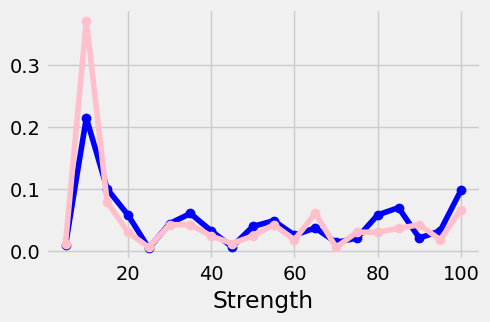

In [16]:
#Ora posso fare la stessa cosa ma con le frequenze relative. uso l0c per poter unire i 2 dataframe in un grafico
male_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='M',
                                                   'Strength'],
                                 columns='Rel. freq.',
                                 normalize=True)
                        .loc[:,'Rel. freq.'])
female_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='F',
                                                     'Strength'],
                                   columns='Rel. freq.',
                                   normalize=True)
                          .loc[:,'Rel. freq.'])

male_strength_freq.plot(marker='o', color='blue', legend=False)
female_strength_freq.plot(marker='o', color='pink', legend=False)
plt.show()

Se siete stati attenti avrete notato che le tabelle delle frequenze ***sono state accedute tramite `loc` al fine di estrarre le corrispondenti serie***. **Ciò è dovuto al fatto che in caso contrario matplotlib avrebbe prodotto due grafici separati**. Quando più avanti parleremo delle frequenze congiunte vedremo un modo semplice per generare un'unica figura contenente i due grafici a barre.

In effetti la cella precedente non genera un vero e proprio grafico a barre, perché per ogni valore della forza ci sarebbero due barre, relative ai due generi. Tali barre si sovrapporrebbero, con l'effetto di nascondere (parzialmente o totalmente) quella più bassa.

Questa sovrapposizione non mi consente di vedere la barra blu dei maschi.

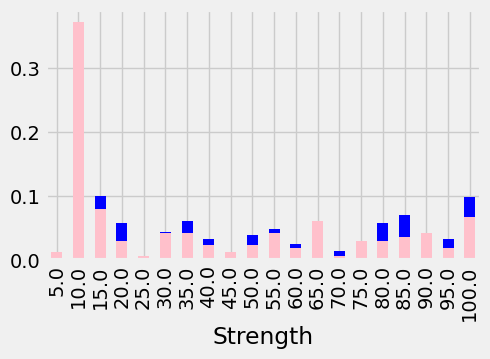

In [17]:
male_strength_freq.plot.bar(color='blue', legend=False)
female_strength_freq.plot.bar(color='pink', legend=False)
plt.show()

Un'alternativa è quella di specificare il parametro `alpha` nelle funzioni che generano i grafici: **ciò permette di disegnare delle barre semi-trasparenti che evidenziano le loro sovrapposizioni.**

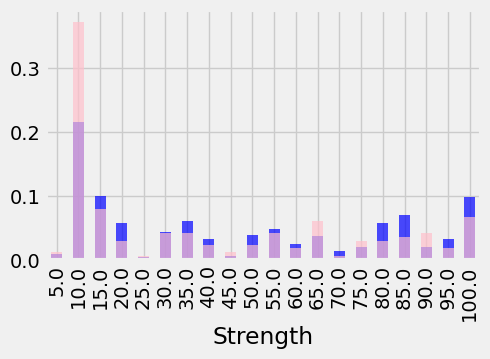

In [18]:
male_strength_freq.plot.bar(color='blue', alpha=.7)
male_strength_freq
female_strength_freq.plot.bar(color='pink', alpha=.7)
plt.show()

Qua c'è anche un problema dell'etichette delle ascisse si possono migliorare 

Una modalità alternativa per visualizzare le frequenze in caso di valori qualitativi, evidenziando inoltre le frazioni rispetto al numero totale dei casi è quella di utilizzare il metodo `pie` per produrre un **diagramma a torta, o più tecnicamente un _aerogramma_,** in cui un cerchio è diviso in tanti settori le cui **aree sono proporzionali alle frequenze (pertanto il grafico ottenuto sarà indipendente dall'avere considerato le frequenze assolute oppure quelle relative)**. Per esempio, la cella seguente calcola il diagramma a torta delle frequenze relative al genere dei supereroi.

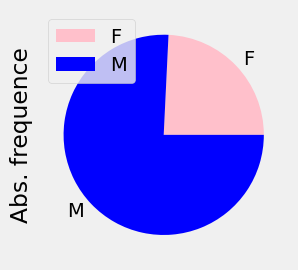

In [19]:
gender_freq.plot.pie(y='Abs. frequence', colors=['pink', 'blue'])
plt.show()

Ci sono alcune cose che vale la pena sottolineare, e che sono descritte di seguito.

- A differenza dei grafici generati fino a ora, qui è stato necessario specificare il nome della colonna nel _dataframe_ corrispondente alla tabella delle frequenze. Ciò è legato al fatto che mentre metodi come `plot.bar` sono in grado di visualizzare più caratteri contemporaneamente (e più avanti vedremo come), quando si disegna un diagrama a torta è necessario utilizzare un solo carattere e quindi è necessario selezionarlo nel dataframe, anche in casi come questo in cui vi è effettivamente un solo carattere; In alternativa, è possibile estrarre la serie dal _dataframe_ e invocare su di essa `plot.pie`: in altre parole l'istruzione seguente avrebbe generato un grafico analogo:

```
gender_freq['Abs. frequence'].plot.pie(colors=['pink', 'blue'])
```

- Mentre quando si crea un grafico a barre per un carattere ha ampiamente senso utilizzare lo stesso colore per tutte le barre, nel caso di un diagramma a torta tale scelta renderebbe il risultato illeggibile, ed è per questo che se si vogliono personalizzare i colori è necessario passare la lista dei corrispondenti nomi all'argomento `colors` (che è diverso dall'argomento `color` finora utilizzato).

<div class="alert alert-warning" role="warning">
Se ottenete un grafico che contiene un'ellissi al posto di un cerchio, probabilmente state utilizzando una versione precedente di pandas, che prevede che le lunghezze sugli assi cartesiani nei grafici siano sempre misurate con unità di misura diverse. Il rapporto tra queste unità di misura è legato alla sezione aurea, e ciò ha di norma l'effetto di produrre grafici gradevoli da vedere, a parte casi come questo in cui i cerchi risultano "schiacciati". Per ovviare all'inconveniente basta invocare la funzione `plt.axis` specificando come argomento `'equal'`.
</div>

Consideriamo il caso particolare dell'anno di apparizione: se ne tracciamo il grafico a barre delle frequenze assolute, è appropriato posizionare le barre rispettando la relazione di ordine esistente tra i dati, utilizzando direttamente matplotlib come abbiamo visto nella lezione precedente.

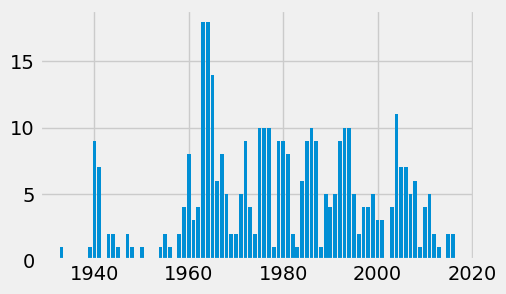

In [20]:
first_app_freq = heroes_with_year['First appearance'].value_counts()
plt.bar(first_app_freq.index, first_app_freq.values)
plt.show()

Il risultato non è però ottimale perché le *barre hanno uno spessore* (sebbene in questo caso sia molto piccolo, a causa dell'elevato numero di barre) che **può suggerire un'interpretazione fuorviante del grafico,** secondo cui le frequenze non facciano riferimento a un anno, bensì a un in intervallo temporale centrato in un anno. Per evitare tale fraintendimento è **più appropriato in casi come questo produrre un grafico *a bastoncini* in cui ogni punto è evidenziato, piuttosto che da una barra, da un segmento verticale** che lo congiunge con l'asse delle ascisse (cosa che, peraltro, permette di non scambiare per nulle le frequenze relativamente basse): metodo `plt.vlines()`

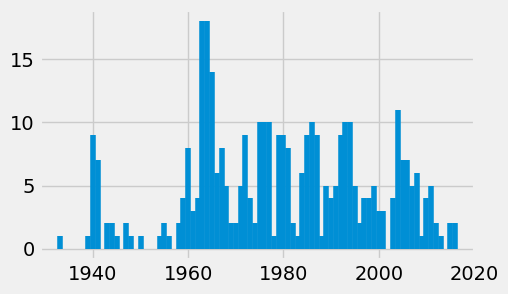

In [46]:
plt.vlines(first_app_freq.index, 0, first_app_freq.values)
plt.show()

**È anche possibile abbinare ogni segmento a un cerchio centrato sul punto che identifica un valore e la sua frequenza: basta generare il grafico precedente e sovrapporgli i singoli punti.**

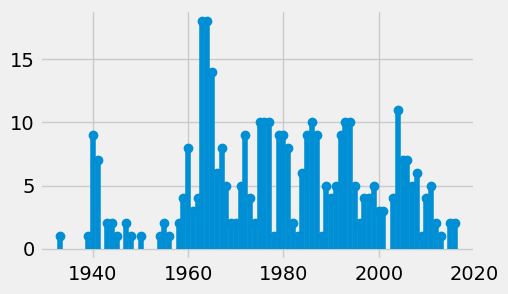

In [54]:
plt.vlines(first_app_freq.index, 0, first_app_freq.values)
plt.plot(first_app_freq.index, first_app_freq.values, 'o')
plt.show()

Infine, consideriamo il diagramma a bastoncini **relativo al peso dei supereroi.**

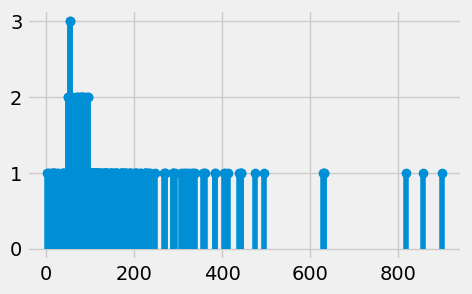

In [55]:
weight_freq = heroes['Weight'].value_counts()

plt.vlines(weight_freq.index, 0, weight_freq.values)
plt.plot(weight_freq.index, weight_freq.values, 'o')
plt.show()

**Due pesi, per dire, di 81.12 Kg e di 81.14 Kg vengono considerati in questo grafico come due valori differenti, ed è per questo che vi sono quasi esclusivamente bastoncini di altezza unitaria**: quasi tutti i valori occorrono praticamente un'unica volta nel dataset. Ciò è dovuto al fatto che il peso è un dato quantitativo per cui non ha di norma senso considerare un singolo valore, e risulta **più sensato calcolare le frequenze di _intervalli_ di possibili valori osservabili.** Il grafico corrispondente prende il nome di **_istogramma_**, e viene calcolato e visualizzato in pandas invocando il metodo `hist` sulla serie corrispondente:<br> `hist` raggruppa i dati e calcola le frequenze

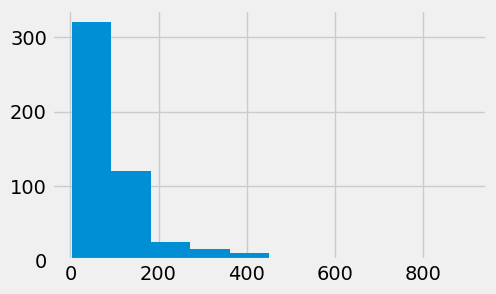

In [58]:
heroes['Weight'].hist()
plt.show()

Ovviamente il risultato ottenuto dipende da come sono stati scelti gli intervalli su cui calcolare le frequenze. Di norma si divide **l'intervallo che contiene tutti i dati osservati in sotto-intervalli equiampi**, il cui numero è individuato dall'argomento `bins`.

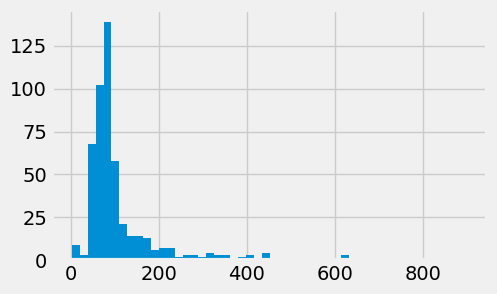

In [62]:
heroes['Weight'].hist(bins=50)
plt.show()

<li>Vedo che ho un grafico UNIMODALE perche c'è solo un dato con quella frequenza assoluta e lo notiamo dal grafico che ha una sola barra alta.<br><li>Non ho un grafico simmetrico<br><li>C'è quella barra sullo 0 più alta di quella dopo, cosa vuol dire? perchè lo 0 ha delle frequenze e quello dopo no?

Questo istogramma ci dice, a occhio, che i pesi variano perlopiù tra zero e duecento chilogrammi, sebbene esistano erori con pesi maggiori. **In teoria è possibile utilizzare sotto-intervalli di ampiezze differenti**: per esempio, **ampiezze pari a 20 per i pesi inferiori a 200 kg., pari a 50 per pesi compresi tra 200 e 500 kg., e pari a 100 per i valori rimanenti**. Il parametro `bins` accetta una lista o tuple quindi passo un alista come argomento di `np.hstack` che mi giustappone diversi array uno a fianco all'altro

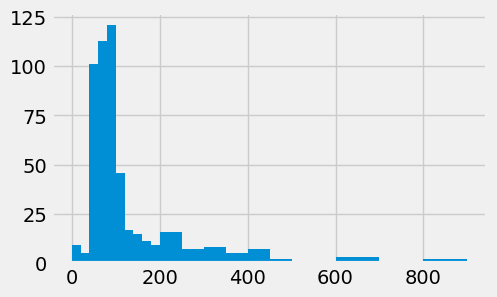

In [63]:
heroes['Weight'].hist(bins=np.hstack((np.arange(0, 200, 20),
                                      np.arange(200, 500, 50),
                                      np.arange(500, 1000, 100))))
plt.show()

Va notato come in questo caso le altezze delle barre non contino il numero di occorrenze nel corrispondente intervallo: per esempio, vi sono tre pesi superiori a 800 kg., ma la barra corrispondente ha altezza unitaria. Ciò è dovuto al fatto che in un istogramma è ***l'_area_ di ogni barra a essere legata alla frequenza***: ***se le barre hanno basi della stessa lunghezza, le aree sono proporzionali all'altezza, altrimenti no.*** È per questo, per esempio, che le due barre più a destra nell'ultimo istogramma hanno altezza unitaria: si riferiscono a tre osservazioni, e la loro area è il triplo dell'area di una barra di altezza unitaria nella parte sinistra del grafico, che invece farebbe riferimento a una sola osservazione.

Nella cella precedente sono state utilizzate le funzioni `np.hstack`, che permette di giustapporre due o più array numpy, e `np.arange`, che crea un array i cui contenuti variano tra i valori indicati dai primi due argomenti, con incremento pari all'ultimo argomento.





<div id="h-5"></div>

## Frequenze cumulate

Riconsideriamo l'anno di prima apparizione dei supereroi, e rispondiamo alle domande che seguono.

1. Qual è il più recente tra gli anni di apparizione di un supereroe?
2. E qual è il meno recente?
3. Quanti supereroi hanno un anno di apparizione non superiore al 1970?
4. Quanti hanno un anno di apparizione successivo al 1980?

Per rispondere alle prime due domande basta selezionare la serie che corrisponde al carattere `first_appearance` e calcolarne il minimo e il massimo valore:

In [64]:
(heroes_with_year['First appearance'].min(), heroes_with_year['First appearance'].max())

(1933.0, 2016.0)

Per rispondere invece alle rimanenti domande potremmo estrarre tramite una _list comprehension_ tutti gli anni in `heroes_with_year` che soddisfano i criteri indicati e calcolarne la lunghezza. Vale però la pena approfittarne per introdurre un nuovo strumento, che si rivelerà molto versatile: si tratta delle **_frequenze cumulate_**, che si possono calcolare quando esiste una relazione di ordine per i valori del carattere. Essenzialmente si tratta di *considerare i valori del carattere dal più piccolo al più grande, di calcolare le relative frequenze e di cumularle in modo che al primo elemento sia associata la sua frequenza, al secondo la somma delle frequenze dei primi due elementi, al terzo la somma delle prime tre frequenze e così via.*

Per calcolare le frequenze cumulate, pandas mette a disposizione il metodo `cumsum` per gli oggetti di tipo serie e _dataframe_. Quando viene utilizzato sulla serie prodotta da `value_counts` è però necessario riordinare le frequenze prodotte rispetto al loro indice e infine si può invocare il metodo. **Risulta invece più comodo calcolare generare il _dataframe_ corrispondente alla tabella delle frequenze, che risulta già ordinato nel modo corretto, e su questo invocare `cumsum`.**

In [70]:
#cum_sum() deve essere associato a una dataframe delle frequenze assolute o relative allora somma la j-esima frequenza con la j-esima-1 frequenza
first_app_freq_cumulate = (pd.crosstab(index=heroes_with_year['First appearance'],
                                       columns=['Cumulate freq.'],
                                       colnames=[''], normalize=True)
                             .cumsum())
first_app_freq_cumulate.iloc[:10] # per brevità visualizziamo solo i primi dieci elementi

,Cumulate freq.
First appearance,
1933.0,0.002732
1939.0,0.005464
1940.0,0.030055
1941.0,0.049180
1943.0,0.054645
1944.0,0.060109
1945.0,0.062842
1947.0,0.068306
1948.0,0.071038


Il grafico corrispondente mette in evidenza il fatto che le frequenze cumulate sono monotone crescenti e variano da 0 al numero totale di casi nel dataset considerato:

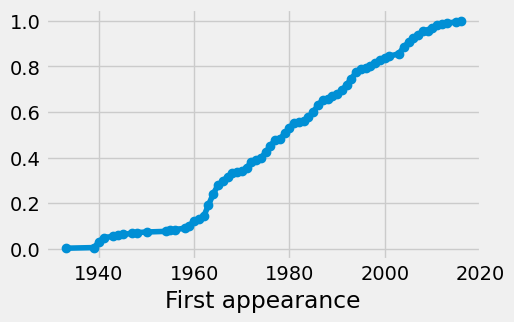

In [71]:
first_app_freq_cumulate.plot(marker='o', legend=False)
plt.show()

Capisco come crescono le apparizioni.

Posso calcolare quanti supereroi sono comparsi prima di una certa data.

*Esempio: calcolo la mediana opssia 0.5 sulle ordinate e poi trovo l'anno. Posso così trovare i diversi quartili a quali anni corrispondono.*

La frequenza cumulata corrispondente a 1970 rappresenta quindi il numero di casi nel dataset in cui l'anno di prima apparizione è minore o uguale al 1970, e dunque tale frequenza rappresenta la risposta alla terza domanda:

In [73]:
first_app_freq_cumulate.at[1970.0, 'Cumulate freq.']

0.34153005464480884

Per rispondere all'ultima domanda è possibile procedere in modo analogo: la frequenza cumulata di 1980 corrisponde al numero di casi in cui l'anno di apparizione è minore o uguale a 1980, e sottraendo tale valore al numero totale di casi si ottiene la risposta:

In [31]:
first_app_freq_cumulate.iat[-1, 0] - first_app_freq_cumulate.at[1980.0, 'Cumulate freq.']

172

Va notato come il numero totale di casi corrisponda all'ultima delle frequenze cumulate. Infine, il concetto di frequenze cumulate si può applicare sia alle frequenze assolute, sia a quelle relative: nel secondo caso i valori ottenuti aumenteranno da 0 a 1. Nella cella seguente viene calcolata la tabella delle frequenze relative cumulate per l'anno di prima apparizione di cui, sempre per brevità, vengono mostrate le ultime dieci righe.

In [32]:
first_app_relfreq_cumulate = (pd.crosstab(index=heroes_with_year['First appearance'],
                              columns=['Cumulate freq.'],
                              colnames=[''],
                              normalize=True).cumsum())

first_app_relfreq_cumulate.iloc[-10:]

,Cumulate freq.
First appearance,
2006.0,0.923497
2007.0,0.937158
2008.0,0.953552
2009.0,0.956284
2010.0,0.967213
2011.0,0.980874
2012.0,0.986339
2013.0,0.989071
2015.0,0.994536


La visualizzazione in forma grafica delle frequenze relative cumulate equivale a quella precedente: l'unica differenza consiste nei valori sull'asse delle ordinate, che risulteranno ovviamente scalati sull'intervallo $[0, 1]$:

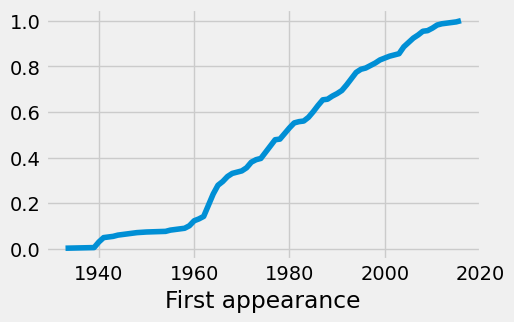

In [33]:
first_app_relfreq_cumulate.plot(legend=False)
plt.show()

Vale la pena notare come il grafico prodotto sia quello una funzione lineare a tratti: in parole povere, si tratta di una sequenza di segmenti in cui ogni elemento ha l'estremo destro coincidente con quello sinistro del segmento successivo. Possiamo evidenziare questa proprietà effettuando uno _zoom_, per esempio tra il 1980 e il 1990:

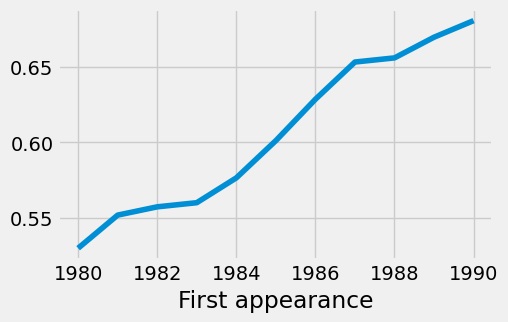

In [34]:
first_app_relfreq_cumulate[1980:1990].plot(legend=False)
plt.show()

Quando i valori osservati sono di tipo numerico o ordinabile, uno strumento molto simile a quello delle frequenze relative cumulate è rappresentato dalla _funzione cumulativa empirica_ (o _funzione di ripartizione empirica_), che dato un insieme di osservazioni $\{ x_1, \dots, x_n \}$, è definita come quella funzione $\hat F: \mathbb R \mapsto [0, 1]$ tale che per ogni $x \in \mathbb R$ assume un valore pari alla frequenza relativa delle osservazioni che risultano essere minori o uguali a $x$. Pertanto

\begin{equation}
\hat F(x) = \frac{\# \{ x_i \leq x \}}{n}
= \frac{1}{n} \sum_{i=1}^n \mathrm I_{(-\infty, x]}(x_i) ,
\end{equation}

dove $\mathrm I_A: \mathbb R \mapsto \{0, 1\}$ indica la _funzione indicatrice_ dell'insieme $A$, che assume valore nullo in corrispondenza di tutti gli argomenti che non appartengono ad $A$ e valore unitario altrimenti, e $(-\infty, x]$ indica l'intervallo semiaperto identificato da tutti i valori reali minori o uguali a $x$. Per un generico argomento $x$, la funzione cumulativa empirica assumerà pertanto come valore la frequenza relativa cumulata del più grande tra i valori osservati $x_i \leq x$. Dunque il suo grafico sarà quello di una funzione costante a tratti. In python è presente un'implementazione della funzione cumulativa empirica nel modulo `statmodels.api`: la funzione `distributions.ECDF` accetta come input un insieme di osservazioni e restituisce la corrispondente funzione cumulativa empirica. Possiamo quindi elaborare in tal senso gli anni di prima apparizione e visualizzare il grafico corrispondente agli anni tra il 1980 e il 1990, così da poter effettuare un confronto con l'analogo grafico precedentemente generato:

In [35]:
import statsmodels.api as sm

ecdf = sm.distributions.ECDF(heroes_with_year['First appearance'])
x = np.arange(1980, 1991)
y = ecdf(x)
plt.step(x, y)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

<div class="alert alert-info">
In casi come questo è meglio usare `plt.step` piuttosto che `plt.plot`, altrimenti il grafico visualizzato, pur essendo molto simile al risultato appena ottenuto, non sarebbe tecnicamente parlando quello di una funzione costante a tratti.
</div>

Va peraltro rimarcato che all'aumentare del numero di valori osservabili il grafico delle frequenze relative cumulate ottenute usando il metodo `plot` della corrispondente serie diventa indistinguibile da quello della funzione cumulativa empirica (sia che si sia utilizzato `plt.step`, sia che si sia utilizzato `plt.plot` per visualizzarlo). Per rendercene conto, possiamo visualizzare nuovamente la funzione di ripartizione empirica tenendo però conto di tutte le osservazioni per gli anni di prima apparizione.

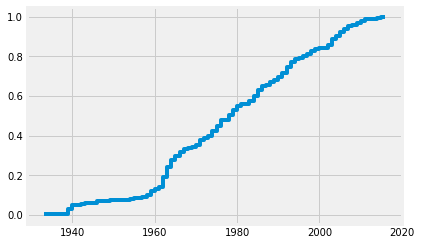

In [ ]:
min_year = min(heroes_with_year['First appearance'])
max_year = max(heroes_with_year['First appearance'])
x = np.arange(min_year, max_year+1)
y = ecdf(x)
plt.step(x, y)
plt.show()

<div id="h-6"></div>

### Diagrammi di Pareto ###

Frequenze e frequenze cumulate di una variabile categorica possono essere considerate congiuntamente per generare un _diagramma di Pareto_ nel modo seguente: ordinando i dati per frequenza decrescente, su uno stesso sistema di riferimento in cui l'asse delle ascisse fa riferimento ai valori della variabile si sovrappongono il diagramma a barre delle frequenze e una linea spezzata che collega i valori delle frequenze cumulate. Consideriamo per esempio i colori degli occhi più frequenti nel nostro dataset (definiti per comodità come i colori che occorrono con frequenza relativa superiore a 0.02). 

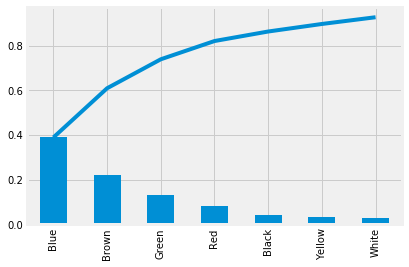

In [ ]:
eye_color = heroes['Eye color']
eye_color_freq = eye_color.value_counts(normalize=True)

eye_color_freq[eye_color_freq>.02].cumsum().plot()
eye_color_freq[eye_color_freq>.02].plot.bar()
plt.show()

Ovviamente per quanto riguarda il valore più a sinistra nel diagramma (e quindi quello avente la frequenza maggiore) frequenza e frequenza cumulata coincideranno sempre.

Va notato come la linea spezzata nel precedente diagramma non arrivi all'ordinata 1, avendo considerato solo un sottoinsieme dei dati: possiamo verificarlo, oltre che visualmente, sommando le frequenze relative:

In [ ]:
sum(eye_color_freq[eye_color_freq>.02])

0.9271758436944938

Se dividiamo tutte le frequenze per la somma ottenuta, apportiamo alle frequenze una correzione che fa sì che ora la loro somma sia esattamente uno (spesso si usa il termine _normalizzazione_ per indicare un'operazione di questo tipo). Il diagramma di Pareto per i valori ottenuti considerando questa correzione si estende ora fino all'ordinata unitaria.

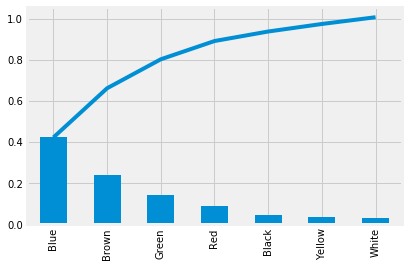

In [ ]:
norm_eye_color_freq = eye_color_freq[eye_color_freq>.02]/0.92
norm_eye_color_freq.cumsum().plot()
norm_eye_color_freq.plot.bar()
plt.show()

In generale, un diagramma di Pareto permette di identificare gli elementi più rilevanti in termini di frequenze all'interno di un insieme di osservazioni, evidenziando simultaneamente il peso di ogni fattore, sia il loro peso cumulativo. Nel nostro caso, il grafico ottenuto mostra permette per esempio di verificare a colpo d'occhio come gli occhi blu, marroni e verdi identifichino l'80% dei supereroi. Va sottolineato però che questo dato numerico è in qualche modo influenzato dalla scelta di avere escluso tutti i colori con una frequenza relativa minore di 0.02. Implementiamo una funzione `my_pareto` che permette di impostare la soglia sulle frequenze e rigeneriamo il grafico, stavolta considerando tutti i dati.

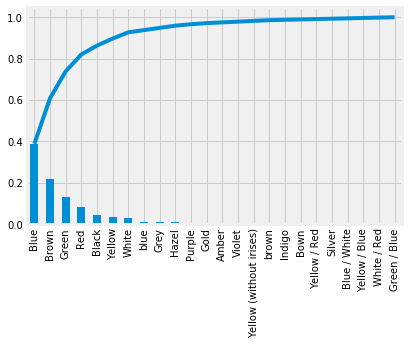

In [ ]:
def my_pareto(data, threshold=0.02, renormalize=False):
    freq = data.value_counts(normalize=True)
    freq = freq[freq > threshold]
    if renormalize:
        freq = freq / sum(freq)
    freq.cumsum().plot()
    freq.plot.bar()

my_pareto(heroes['Eye color'], threshold=0)

Notate come il grafico ottenuto sia particolarmente poco leggibile, essendo popolato nella metà destra da colori che, presi singolarmente, hanno una frequenza non rilevabile nel diagramma a barre. Considerate cumulativamente, queste frequenze hanno però un effetto sul grafico: in effetti, se vogliamo considerare l'80% dei dati è necessario includere anche il colore rosso. La definizione della funzione `my_pareto` evita in effetti di correggere i dati, a meno che non venga specificamente indicato tramite l'argomento `renormalize`, così da ottenere un grafico più preciso.

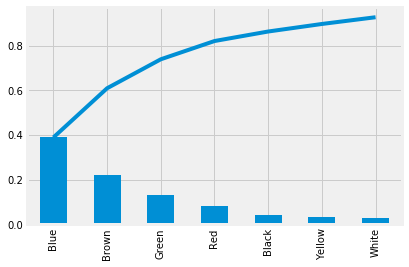

In [ ]:
my_pareto(heroes['Eye color'], threshold=0.015)

Il corrispondente diagramma di Pareto si può generare manualmente oppure utilizzando la funzione `pareto` del package `paretochart`:

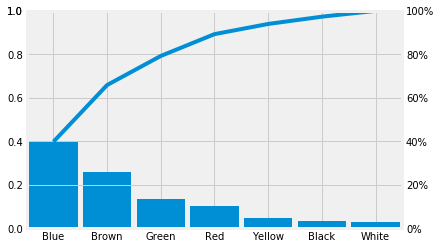

In [ ]:
from paretochart import pareto

eye_color = heroes_with_year['Eye color']
eye_color_freq = eye_color.value_counts(normalize=True)

common_colors = eye_color_freq[eye_color_freq > .02].index
common_color_data = eye_color[eye_color.isin(common_colors)]

pareto(common_color_data.value_counts(normalize=True),
       labels=common_colors)
       
plt.show()

Bisogna sottolineare che il package `paretochart` è, al momento, non ancora stato portato alla versione 3 di python. La community ha però provveduto creando una _fork_ chiamata `rogeriopradoj-paretochart` installabile tramite `pip`.





<div id="h-7"></div>

## Frequenze congiunte e marginali


Spesso è utile analizzare un insieme di osservazioni prendendo in considerazione due caratteri al posto di uno, per esempio per vedere se i valori di tali caratteri tendano a essere più o meno collegati tra loro tramite una relazione. Il concetto di frequenza si specializza in questo caso andando a contare il numero di osservazioni in cui i due caratteri considerati assumono due determinati valori, ottenendo la cosiddetta _frequenza congiunta assoluta_ (o equivalentemente la _frequenza congiunta relativa_ nel caso in cui si calcolasse la frazione di osservazioni e non il suo numero). Nel caso in cui i possibili valori osservabili non siano parecchi, è possibile visualizzare queste frequenze tramite una _tabella delle frequenze congiunte_ (detta anche _tabella di contingenza_), ottenuta estendendo il concetto di tabella delle frequenze precedentemente introdotto: ora le righe della tabella corrisponderanno ai possibili valori di uno dei caratteri considerati, le sue colonne corrisponderanno ai valori del rimanente carattere e gli elementi della tabella conterranno le frequenze congiunte (assolute o relative). La funzione `pd.crosstab` può essere utilizzata anche per produrre questo tipo di tabella: basta indicare le serie corrispondenti ai caratteri considerati come valori degli argomenti `index` e `columns`.

In [ ]:
int_gender_freq = pd.crosstab(index=heroes['Intelligence'], 
                              columns=heroes['Gender'])

int_gender_freq

Gender,F,M
Intelligence,,
average,38,101
good,78,165
high,27,112
low,0,13
moderate,21,37


L'ordine delle righe può essere modificato nello stesso modo visto per le tabelle delle frequenze: per modificare la tabella in modo che risulti ordinata per i valori di intelligenza piuttosto che in modo alfabetico sarà quindi sufficiente utilizzare in metodo `reindex`.

In [ ]:
int_gender_freq = int_gender_freq.reindex(['low', 'moderate',
                                           'average', 'good', 'high'])
int_gender_freq

Gender,F,M
Intelligence,,
low,0,13
moderate,21,37
average,38,101
good,78,165
high,27,112


Siccome `crosstab` produce dei dataframe, per riordinare le colonne è sufficiente accedere alla tabella tramite `loc` e specificando come secondo argomento una lista dei valori nell'ordine desiderato:

In [ ]:
int_gender_freq.loc[:,['M', 'F']]

Gender,M,F
Intelligence,,
low,13,0
moderate,37,21
average,101,38
good,165,78
high,112,27


In modo analogo è possibile visualizzare solo alcune righe oppure solo alcune colonne della tabella, come nella cella seguente:

In [ ]:
int_gender_freq.loc['moderate':'good', :]

Gender,F,M
Intelligence,,
moderate,21,37
average,38,101
good,78,165


<div class="alert alert-warning">
Va notato che quella appena ottenuta non è più una tabella delle frequenze, in quanto non fa riferimento a tutti i possibili valori in gioco.
</div>

Sempre ipotizzando che il numero di valori osservabili non sia troppo elevato, la visualizzazione grafica delle frequenze congiunte può essere effettuata estendendo il concetto di diagramma a barre in modo che visualizzi due caratteri al posto di uno, _raggruppando_ le barre che fanno riferimento a uno stesso valore per uno dei caratteri, e _colorandole_ in funzione del valore che queste assumono per l'altro carattere in gioco. Il posizionamento delle barre viene normalmente fatto in due possibili modi:

- invocando il metodo `plot.bar` invocato sulla tabella, in modo che le barre relative a uno stesso valore risultino _affiancate_

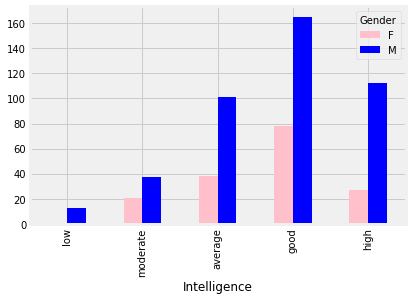

In [ ]:
int_gender_freq.plot.bar(color=['pink', 'blue'])
plt.show()

- specificando ulteriormente il valore `True` per l'argomento `stacked`, in modo da _sovrapporre_ le barre che si riferiscono a uno stesso valore:

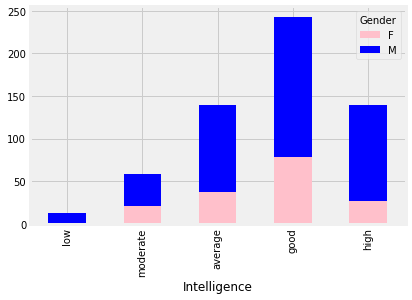

In [ ]:
int_gender_freq.plot.bar(color=['pink', 'blue'], stacked=True)
plt.show()

Nel caso in cui si volessero calcolare le frequenze congiunte e almeno uno dei caratteri fosse numerico, si rischierebbe di ricadere nello stesso problema descritto quando abbiamo parlato degli istogrammi: si consideri per esempio il tentativo di calcolare le frequenze congiunte di peso e genere:

In [ ]:
pd.crosstab(index=heroes['Weight'], columns=[heroes['Gender']]).iloc[:10,:]

Gender,F,M
Weight,,
2.34,0,1
4.82,0,1
9.79,0,1
14.67,0,1
16.20,0,1
17.01,0,1
18.11,0,1
18.45,0,1
19.00,0,1


Essenzialmente in ogni riga c'è un valore nullo e uno unitario, semplicemente perché succede quasi sempre che un particolare valore del peso specificato fino ai decigrammi occorra un'unica volta nelle osservazioni. È quindi opportuno raggruppare assieme pesi «vicini» tra loro. Ciò viene fatto utilizzando la funzione `pd.cut`, che converte una serie di valori numerici in una serie qualitativa i cui valori possibili sono gli intervalli di una partizione aventi per estremi i valori specificati in corrispondenza dell'argomento `bins`. Considerando questa nuova serie è possibile generare una tabella di frequenze congiunte più significativa.

In [ ]:
pd.crosstab(index=pd.cut(heroes['Weight'],
                         bins=[30, 50, 80, 100, 200, 500, 1000]),
            columns=[heroes['Gender']])

Gender,F,M
Weight,,
"(30, 50]",4,4
"(50, 80]",116,88
"(80, 100]",5,111
"(100, 200]",11,84
"(200, 500]",5,38
"(500, 1000]",1,5


Le impostazioni predefinite di `pd.cut` fanno riferimento a intervalli aperti a sinistra e chiusi a destra, ma è possibile invertire l'apertura e la chiusura degli estremi utilizzando l'argomento opzionale `right`:

In [ ]:
pd.crosstab(index=pd.cut(heroes['Weight'],
                         bins=[30, 50, 80, 100, 200, 500, 1000],
                         right=False),
            columns=[heroes['Gender']])

Gender,F,M
Weight,,
"[30, 50)",4,4
"[50, 80)",116,88
"[80, 100)",5,111
"[100, 200)",11,84
"[200, 500)",5,38
"[500, 1000)",1,5


Quando si genera una tabella di frequenze congiunte, è possibile specificare il valore `True` per l'argomento `margins` al fine di aggiungere una riga e una colonna che contengono i totali (calcolati rispettivamente sulle singole colonne e sulle singole righe). I valori ivi indicati prendono il nome di _frequenze marginali_, e corrispondono alle frequenze del carattere corrispondente. Per esempio, rigenerando la tabella delle frequenze congiunte di livello di intelligenza e genere con le colonne dei totali,

In [ ]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'], margins=True)

Gender,F,M,All
Intelligence,,,
average,38,101,139
good,78,165,243
high,27,112,139
low,0,13,13
moderate,21,37,58
All,164,428,592


la colonna `All` conterrà le frequenze assolute per il carattere Intelligence, e parimenti la righa `All` elencherà le frequenze assolute per il genere (escludendo ovviamente in entrambi i casi l'ultimo elemento che corrisponde al numero totale di osservazioni).

Le frequenze congiunte a cui abbiamo fatto riferimento negli esempi visti finora erano frequenze assolute, ma è immediato estendere tale concetto a quello delle _frequenze congiunte relative_. Queste si possono calcolare dividendo le frequenze assolute per il numero totale di osservazioni, oppure utilizzando come in precedenza il parametro `normalize` in `pd.crosstab`, che però ora ha diversi valori possibili:

- specificando `'all'` vengono effettivamente calcolate le frequenze relative

In [ ]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'],
            margins=True,
            normalize='all')

Gender,F,M,All
Intelligence,,,
average,0.064189,0.170608,0.234797
good,0.131757,0.278716,0.410473
high,0.045608,0.189189,0.234797
low,0.000000,0.021959,0.021959
moderate,0.035473,0.062500,0.097973
All,0.277027,0.722973,1.000000


- usando `'index'` si otterrà una tabella in cui i valori su ogni riga sommano a 1

In [ ]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'],
            margins=True,
            normalize='index')

Gender,F,M
Intelligence,,
average,0.273381,0.726619
good,0.320988,0.679012
high,0.194245,0.805755
low,0.000000,1.000000
moderate,0.362069,0.637931
All,0.277027,0.722973


- indicando invece `columns` viene generata una tabella in cui tutte le colonne sommano al valore unitario

In [ ]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'],
            margins=True,
            normalize='columns')

Gender,F,M,All
Intelligence,,,
average,0.231707,0.235981,0.234797
good,0.475610,0.385514,0.410473
high,0.164634,0.261682,0.234797
low,0.000000,0.030374,0.021959
moderate,0.128049,0.086449,0.097973


La normalizzazione per colonne permette di ottenere una tabella che contiene le frequenze relative di due sotto-popolazioni come nel caso precedentemente visto, relativo alla forza di supereroi e supereroine. Invocando `plot` o `plot.bar` su questa tabella si ottiene in modo semplice un grafico che permette di confrontare visualmente tali frequenze.

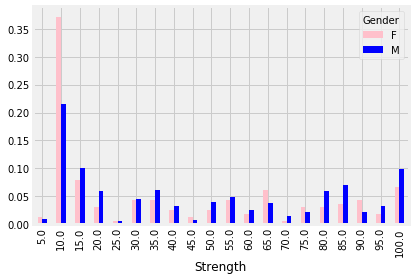

In [ ]:
pd.crosstab(index=heroes['Strength'],
            columns=[heroes['Gender']],
            normalize='columns').plot.bar(color=['pink', 'blue'],
                                          stacked=False)
plt.show()

Abbiamo visto in una lezione precedente come generare direttamente un grafico di una serie senza elaborarla (calcolando per esempio le sue frequenze) produce un risultato che non è normalmente informativo. Le cose sono diverse quando si considerano congiuntamente due serie con un medesimo indice: in tal caso per ogni elemento di questo indice (e dunque per ogni osservazione), i valori delle due serie possono essere utilizzati per individuare le coordinate di un punto nel piano. Visualizzando i punti corrispondenti a tutte le osservazioni si ottiene un _diagramma di dispersione_ (o _scatter plot_). In pandas questo tipo di grafico si genera invocando il metodo `plot.scatter` sul _dataframe_ che contiene le osservazioni, indicando come argomenti i nomi dei caratteri che devono essere considerati (il primo dei quali verrà visualizzato sull'asse delle ascisse, usando invece quello delle ordinate per il secondo). Per esempio nella cella seguente viene visualizzato il diagramma di dispersione dei caratteri relativi ad altezza e peso dei supereroi di genere maschile.

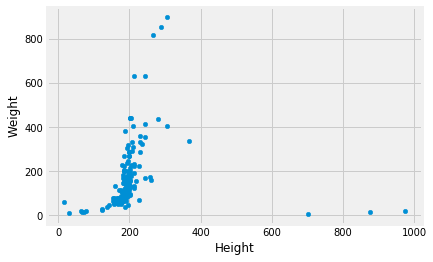

In [ ]:
heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')
plt.show()

I diagrammi di dispersione permettono di valutare visivamente se esistano delle relazioni che legano i due caratteri visualizzati. Per esempio nel grafico precedente si nota come tendenzialmente a un valore alto del peso corrisponda un valore alto per l'altezza e viceversa. Volendo è possibile aggiungere al grafico una retta che metta in evidenza tale tipo di relazione:

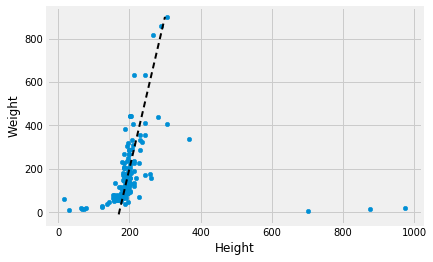

In [ ]:
heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')

trend = lambda x: -1200 + x * 7
x_range = [170, 300]
line, = plt.plot(x_range, list(map(trend, x_range)), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)
plt.show()

In questo caso la retta è stata posizionata «a mano»: esistono metodi che ci permettono di determinarla in funzione delle osservazioni. Per il momento mettiamo in evidenza la possibilità di definire in modo formale una retta scelta in modo da minimizzare una sua distanza da tutti i punti, utilizzando il cosiddetto _metodo dei minimi quadrati_. La cella seguente mostra come determinare tale retta, avendo cura di lavorare su una copia del _dataframe_ sulla quale invocare il metodo `dropna` che elimina le righe in cui è presente almeno un valore mancante.

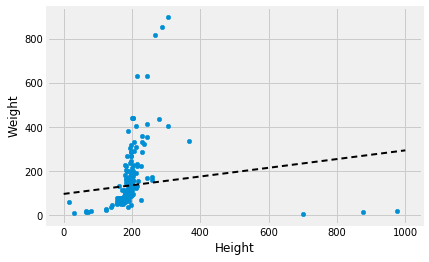

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

heroes_with_data = heroes[heroes['Gender']=='M'].copy().dropna()

X = heroes_with_data.loc[:, ['Height']]
Y = heroes_with_data['Weight']

regr.fit(X, Y)

heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')

line, = plt.plot([0, 1000], regr.predict([[0], [1000]]), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)

plt.show()

Anche in questo caso si rimanda alla [documentazione ufficiale](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) per gli approfondimenti del caso. Notiamo solo come la presenza dei tre valori estremi nella parte destra del grafico fa sì che la retta ottenuta sia sensibilmente diversa rispetto a quella tracciata a mano. Le cose cambiano se non si considerano questi tre valori.

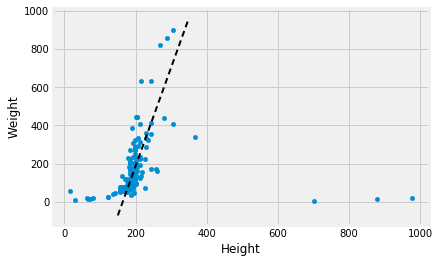

In [ ]:
heroes_with_data = heroes_with_data[heroes_with_data['Height']<300]

X = heroes_with_data.loc[:, ['Height']]
Y = heroes_with_data['Weight']

regr.fit(X, Y)

heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')

line, = plt.plot([150, 350], regr.predict([[150], [350]]), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)

plt.show()

Va infine notato che le relazioni tra due caratteri non necessariamente hanno una forma lineare, ma approfondire questo aspetto esula dal carattere introduttivo di questo corso.

In [ ]:
male_heroes = heroes_with_data[heroes_with_data['Gender']=='M']
male_heroes['Height'].cov(male_heroes['Weight'])

1817.2108845049506

In [ ]:
male_heroes['Height'].corr(male_heroes['Weight'])

0.8268581935167995





<div id="h-8"></div>

## Alcuni approfondimenti sulla generazione dei grafici <sup>*</sup>

<div class="alert alert-info">
I paragrafi contrassegnati con un asterisco sono opzionali. È dunque possibile saltarli a meno che non si voglia approfondire gli argomenti ivi contenuti.
</div>

Una cella grafica generata da matplotlib e visualizzata nel notebook contiene quella che viene definita una _figura_ (tecnicamente, un oggetto della classe `plt.Figure`). Ogni figura può contenere uno o più _sistemi cartesiani_ (oggetti della classe `plt.Axes`) i quali a loro volta contengono (nella maggior parte dei casi) due _assi cartesiani_ (oggetti della classe `plt.Axis`, da non confondere con `plt.Axes`). Tutte le figure che abbiamo generato finora contenevano un unico sistema di assi cartesiani, su cui venivano eventualmente sovrapposti tutti i grafici che venivano creati. È però possibile ottenere figure in cui più sistemi cartesiani vengono affiancati su una griglia bidimensionale. Ciò permette per esempio di affiancare grafici diversi. La gestione di tale griglia è di norma demandata alla funzione `plt.subplot`, che accetta tre argomenti interi: i primi due indicano rispettivamente il numero di righe e di colonne nella griglia, e il terzo specifica una posizione nella griglia stessa (con la convenzione che in una griglia di $n$ colonne 1 indica la posizione nella prima riga e nella prima colonna, 2 quella nella prima riga e nella seconda colonna e così via fino a $n$ che indica l'ultima posizione nella prima riga; procedendo oltre si passa alla riga successiva, così che $n+1$ individua la seconda riga e la prima colonna e via discorrendo. Una volta che `plt.subplot` è stato invocato, questo restituisce l'oggetto corrispondente al sistema cartesiano relativo, che conterrà (eventualmente sovrapponendoli) tutti i grafici generati fino alla successiva invocazione di `plt.subplot`. Questo è quello che succede per esempio quando si invocano i metodi di `plot` su una serie: nella cella seguente per esempio vengono affiancati i diagrammi a torta relativi alle frequenze di genere e livello di intelligenza.

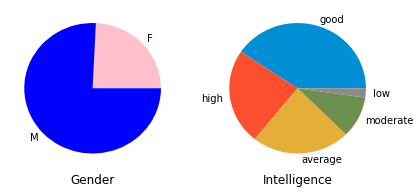

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
gender_freq['Abs. frequence'].plot.pie(colors=['pink', 'blue'])
plt.ylabel('')
plt.xlabel('Gender')
plt.subplot(1, 2, 2)
heroes['Intelligence'].value_counts().plot.pie()
plt.ylabel('')
_ = plt.xlabel('Intelligence')

Va notato che in questo caso l'invocazione di `plt.axis('equal')` non sortirebbe l'effetto desiderato di mostrare due cerchi, in quanto il metodo agisce sulla figura e non sui suoi assi. È quindi necessario impostare manualmente la dimensione della figura in modo che la base sia pari al doppio dell'altezza, così che entrambi i sistemi cartesiani risultino nei fatti essere dei quadrati. Ciò viene fatto grazie all'invocazione preliminare di `plt.figure`, che crea una figura di dimensioni specifiche piuttosto che ottenere una figura predefinita.

<div class="alert alert-info">
Nella cella precedente va notata anche l'invocazione di `plt.xlabel` e `plt.ylabel` che spostano la descrizione dei diagrammi dall'asse delle ordinate a quello delle ascisse (per aumentare la leggibilità), inserendo nel contempo delle descrizioni più informative.
</div>

Vi sono però alcuni casi in cui la generazione di un grafico implica la creazione di un nuovo sistema cartesiano nella figura: un esempio di questo comportamento si ha quando vengono generati dei grafici invocando i metodi di `plot` su un _dataframe_ piuttosto che su una serie. I due diagrammi a barre non vengono sovrapposti, bensì affiancati uno sopra l'altro.

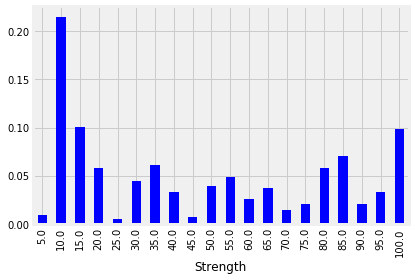

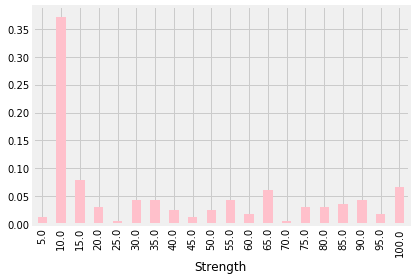

In [ ]:
male_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='M','Strength'],
                                  columns='Abs. freq.',
                                  normalize=True))

female_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='F','Strength'],
                                    columns='Abs. freq.',
                                    normalize=True))

male_strength_freq.plot.bar(color='blue', legend=False)
female_strength_freq.plot.bar(color='pink', legend=False)
plt.show()

Se si volessero affiancare i due grafici in modo orizzontale (cosa che peraltro aiuterebbe il confronto) è quindi necessario agire in modo diverso, notando che `plt.subplot` restituisce l'oggetto relativo al sistema cartesiano creato e che le funzioni di matplotlib accettano generalmente un argomento `ax` a cui passare il sistema in cui il risultato deve essere inserito.

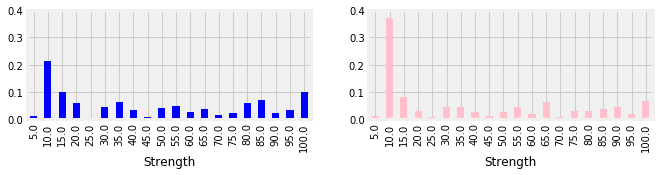

In [ ]:
ax = plt.subplot(1, 2, 1)
male_strength_freq.plot.bar(color='blue', legend=False, ax=ax, figsize=(10, 2))
plt.ylim((0, 0.4))
ax = plt.subplot(1, 2, 2)
female_strength_freq.plot.bar(color='pink', legend=False, ax=ax, figsize=(10, 2))
_ = plt.ylim((0, 0.4))

Va notato come nei due grafici a barre siano stati impostati i limiti degli assi delle ascisse a un valore comune: in caso contrario il confronto tra le due immagini sarebbe potuto risultare sfalsato.

<div class="alert alert-info">
I più attenti avranno notato che python distingue automaticamente i nomi formali dei parametri dai corrispondenti valori effettivi, cosa che permette di scrivere `ax=ax` nelle precedenti invocazioni di `plot.bar`.
</div>

Infine, metodi come `plot` restituiscono il riferimento ai sistemi cartesiani su cui hanno operato: ciò permette di sovrapporre dei grafici anche invocando metodi il cui comportamento predefinito è quello di creare un nuovo sistema.

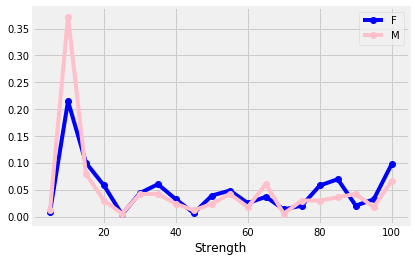

In [ ]:
ax = male_strength_freq.plot(marker='o', color='blue')
female_strength_freq.plot(marker='o', color='pink', ax=ax, legend=False)
ax.legend(['F', 'M'])
plt.show()

<div class="alert alert-info">
Nella cella precedente è stato utilizzando il metodo `legend` per modificare le etichette indicate nella legenda.
</div>




<div id="h-9"></div>

## I diagrammi stelo-foglia <sup>*</sup>
Un _diagramma stelo-foglia_ (o _diagramma ramo-foglia_, o secondo la terminologia inglese _diagramma stem and leaf_) si ottiene considerando delle osservazioni a valori numerici, ordinandole e suddividendo ogni osservazione in una parte _meno significativa_ (rappresentata da un numero prefissato di cifre meno significative) e una parte _più significativa_ (rappresentata dalle rimanenti cifre più significative). Le osservazioni aventi la medesima parte più significativa vengono raggruppate in uno stesso _stelo_, costituito da questa parte significativa seguita da una barra verticale e poi da tutte le parti meno significative (le _foglie_) separate da virgola. Per esempio il diagramma seguente descrive gli anni di prima apparizione dei primi cinquanta eroi del nostro dataset, dove le foglie sono costruite considerando la cifra meno significativa di ogni anno.

<pre style="margin-left:0; line-height:1em">
194|1
195|9
196|5, 4, 3, 8, 5, 3, 0, 1, 8, 4, 2
197|9, 2, 5, 7, 2, 7, 5
198|5, 0, 6, 1, 4, 4, 1, 1, 0, 6, 4, 5, 2
199|3, 5, 6, 4
200|8, 7, 1, 5, 4, 5, 5, 4, 3, 4, 1
201|1, 1
</pre>

<div class="alert alert-warning">
Il resto di questo paragrafo richiede una discreta conoscenza della programmazione in python, per cui vale la pena tralasciarlo durante una lettura preliminare.
</div>

Per non complicarci troppo la vita, assumiamo di avere a disposizione dei dati interi: già così la costruzione di un diagramma stelo-foglie richiede una certa dose di perizia. Innanzitutto è necessario eliminare i valori mancanti dai dati:

In [ ]:
x = [s for s in heroes_with_year['First appearance'][:50] if not np.isnan(s)]

È poi necessario indicare il numero di cifre significative che comporranno le foglie. Memorizziamo nelle variabili `d` e `signif`, rispettivamente, tale numero e la corrispondente potenza di dieci.

In [ ]:
significant_digits = 1
signif = 10**significant_digits

Il passo successivo consiste nel costruire tutti i possibili valori per gli steli. In teoria, il più piccolo di questi valori corrisponde al minimo elemento considerato a cui va tolta la parte meno significativa. Questa operazione richiede di convertire l'elemento in un valore intero e poi dividerlo per la potenza di 10 memorizzata in `signif` (che equivale a eliminare le `d` cifre meno significative).

In [ ]:
r = np.arange(int(min(x))/signif, (int(max(x))/signif + 1))

Risulta ora possibile eliminare da `r` tutti i valori che non rappresentano uno stelo, che sono quelli in corrispondenza dei quali non vi è alcuna foglia. 

In [ ]:
start = [s for s in r
         if len([e for e in x if s*signif <= e < (s+1)*signif])]

Il diagramma vero e proprio si ottiene costruendo per ogni stelo una coppia contenente il valore dello stelo e una lista di tutte le foglie corrispondenti. Per comodità, convertiremo già le foglie in stringhe, avendo cura di aggiungere eventuali zeri iniziali.

In [ ]:
stem = [(s, ['{:0{width}d}'.format(int(i%(s*signif)), width=significant_digits) if s
                                                                                else str(int(i))
             for i in x if signif*s <= i < signif*s+signif])
        for s in start]

La visualizzazione del diagramma richiede di convertire in stringa le coppie generate. Ciò può essere fatto invocando la funzione `format` su un'opportuna stringa di formattazione che ci permette di ottenere i vari rami nel formato richiesto e di inserirli in una lista, per poi concatenare gli elementi di quest'ultima separandoli tramite un carattere di `a capo`.

In [ ]:
import math
print('\n'.join(list(map(lambda e: '{:>{width}}|{}'.format(e[0],
                                                           ', '.join(e[1]),
                                                           width=int(1+math.log10(max(start)))),
                         stem))))

194.1|0
195.1|8, 9
196.1|4, 3, 2, 7, 4, 2, 0, 7, 3, 1
197.1|9, 8, 9, 1, 4, 6, 1, 6, 4
198.1|4, 5, 0, 3, 3, 0, 0, 5, 3, 4, 1
199.1|2, 4, 5, 3
200.1|7, 6, 0, 4, 3, 4, 4, 3, 2, 3, 0
201.1|0, 0


Per poter generare velocemente altri diagrammi stelo-foglia, è opportuno riscrivere il codice qui sopra organizzandolo all'interno di una funzione.

In [ ]:
def stem_leaf(data, significant_digits=1):
    x = [s for s in data if not np.isnan(s)]
    signif = 10**significant_digits

    r = np.arange(int(min(x))/signif, int(max(x))/signif + 1)
    start = [s for s in r if len([e for e in x if s*signif <= e < (s+1)*signif])]
    stem = [(s, ['{:0{width}d}'.format(int(i%(s*signif)), width=significant_digits) if s
                                                                                    else str(int(i))
                 for i in x if signif*s <= i < signif*s+signif])
            for s in start]

    return '\n'.join(list(map(lambda e: '{:>{width}}|{}'.format(e[0],
                                                                ', '.join(e[1]),
                                                                width=int(1+math.log10(max(start)))),
                              stem)))

Ciò ci permette, per esempio, di calcolare il diagramma per un numero maggiore di osservazioni.

In [ ]:
print(stem_leaf(heroes_with_year['First appearance'][:150]))

193.9|2, 1, 5, 1, 2, 9, 1, 2, 2, 0, 8
194.9|6
195.9|0, 6, 5, 4, 9, 6, 4, 1, 2, 9, 5, 3, 7, 6, 5, 5, 5, 4, 0, 6, 8, 5, 4, 9, 4, 4, 4, 4, 5, 6, 0, 4, 6, 5
196.9|3, 6, 8, 3, 8, 6, 7, 8, 4, 8, 7, 3, 2, 7, 7, 6, 3, 6, 6, 6, 2, 2, 1
197.9|6, 1, 7, 2, 5, 0, 5, 2, 2, 1, 7, 5, 6, 3, 1, 1, 0, 7, 2, 1, 2, 7, 8, 0, 6, 8, 6, 8, 8, 5
198.9|4, 6, 7, 5, 4, 4, 4, 9, 3, 9, 3, 9, 6, 5, 0, 0, 1, 0, 7, 6, 8
199.9|9, 8, 2, 6, 5, 6, 6, 5, 4, 5, 2, 0, 1, 0, 1, 9, 8, 5, 8, 5, 2, 1, 7, 5
200.9|2, 2, 1, 2, 3, 6


<div class="alert alert-info">
Il codice sopra prodotto è basato su alcune funzionalità avanzate della funzione `format` invocabile sulle stringhe. In particolare, viene formattato dell'output forzando la conversione da numeri in stringhe in modo da garantire che il risultato contenga un numero minimo (ma variabile) di caratteri, aggiungendo ove necessario in un caso degli spazi e in un altro degli zeri. Per approfondire la tematica della formattazione dell'output si rimanda alla  [documentazione ufficiale](https://docs.python.org/2/tutorial/inputoutput.html).
</div>

<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Dati e frequenze, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>